In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("Downloads/Real estate.csv")

In [42]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [43]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [44]:
df = df.drop(['No'],axis=1)

In [45]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [47]:
# sns.pairplot(df,diag_kind='kde')

<IPython.core.display.Javascript object>

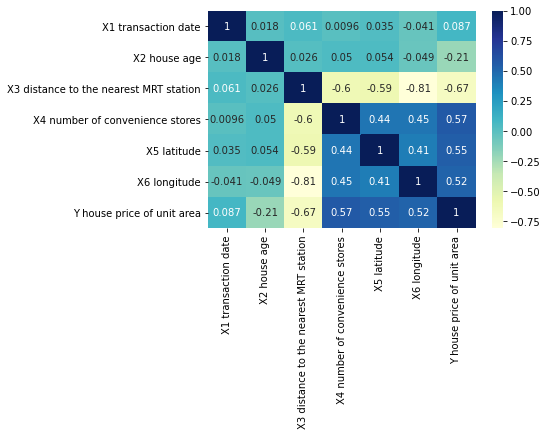

In [48]:
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')

<IPython.core.display.Javascript object>

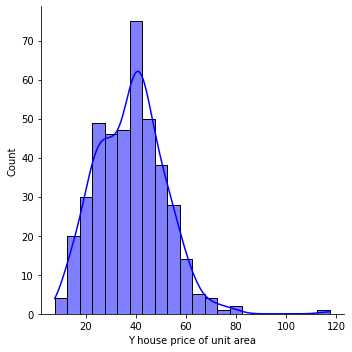

In [49]:
sns.displot(data= df, x='Y house price of unit area', kde=True , color='b')

In [50]:
X=df.drop('Y house price of unit area',axis=1)
y=df['Y house price of unit area']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train , x_test , y_train , y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [54]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coeficient'])

,Coeficient
X1 transaction date,5.440742
X2 house age,-0.270791
X3 distance to the nearest MRT station,-0.004759
X4 number of convenience stores,1.091425
X5 latitude,229.043054
X6 longitude,-29.492591


In [55]:
y_pred=lr.predict(x_test)
y_pred

array([47.88625422, 41.16404556, 44.27301439, 40.19761542, 27.51326511,
       45.10953115, 44.63293274, 46.36346234, 23.62063133, 54.33444894,
       34.07416461, 36.54533193, 37.55154254, 23.2794052 , 35.26614165,
       34.38327747, 43.35633504, 45.40740539, 30.07083159, 44.09191493,
        0.73505984, 34.99271686, 48.22735154, 45.48646485, 11.5995282 ,
       39.69783664, 12.71276251, 42.91282893, 34.93451401, 37.27964515,
       13.17842185, 40.12708486, 35.21883505, 27.71588924, 46.40090931,
       31.21941994, 50.90046891, 14.07339433, 49.05344276, 40.0538446 ,
       38.24588962, 40.63256441, 47.01634759, 37.65598977, 39.85801839,
       46.88588156, 43.7241343 , 20.94434531, 47.41546271, 45.40608841,
       48.33783579, 48.98845389, 42.27403852, 42.5841908 , 36.04088185,
       14.95491907, 36.61494629, 34.88196676, 28.33519081, 45.91188076,
       33.19268817, 32.18910095, 14.95491907,  8.86547927, 10.36079881,
       34.11119212, 28.48186875, 46.59826043, 32.96743316, 31.47

In [56]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)


pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

##RSME is always greater than or equal to MAE (RSME >= MAE). 
##The greater difference between them indicates greater variance in 
##individual errors in the sample.

,Metrics
MAE,5.305356
MSE,53.505619
RMSE,7.314754


In [57]:
test_residuals=y_test-y_pred
pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'test_residuals':y_test-y_pred})

,y_test,y_pred,test_residuals
358,45.1,47.886254,-2.786254
350,42.3,41.164046,1.135954
373,52.2,44.273014,7.926986
399,37.3,40.197615,-2.897615
369,22.8,27.513265,-4.713265
...,...,...,...
31,25.0,40.368699,-15.368699
283,23.5,33.091396,-9.591396
157,35.6,42.327834,-6.727834
203,46.1,43.353985,2.746015


In [58]:
from sklearn.metrics import r2_score
R2 = metrics.r2_score(y_test,y_pred)
print(R2)

0.6810580555095651


In [59]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [60]:
df1

,Actual,Predicted
358,45.1,47.886254
350,42.3,41.164046
373,52.2,44.273014
399,37.3,40.197615
369,22.8,27.513265
...,...,...
31,25.0,40.368699
283,23.5,33.091396
157,35.6,42.327834
203,46.1,43.353985


In [61]:
print(' residual sum of squares is : '+ str(np.sum(np.square(df1['Predicted'] - df1['Actual']))))

 residual sum of squares is : 4440.966387334081


In [62]:
import numpy as np
mean = np.mean(y_test)
print('Total Sum of Squares is :'+str(np.sum(np.square(mean - df1['Actual']))))

Total Sum of Squares is :13924.058795180725


In [63]:
print('Regression Sum of squares :'+str(np.sum(np.square(df1['Predicted'] - mean))))

Regression Sum of squares :10130.073234515916


In [64]:
## if my Total sum of squares > residuals sum of squares = My model is good
## if my R2 score is near to 1 shows that my model is very good


In [65]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True)
lasso_reg.fit(x_train,y_train)
y_pred_lass =lasso_reg.predict(x_test)
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score(y_pred_lass,y_test))



Lasso SCORE :  0.8216658860577704


In [66]:
from sklearn.metrics import r2_score
R2 = metrics.r2_score(y_test,y_pred_lass)
print(R2)

-0.025094270136263974


In [67]:
from sklearn.linear_model import Ridge
Ridge_reg = Ridge(normalize=True)
Ridge_reg.fit(x_train,y_train)
y_pred_Ridge =Ridge_reg.predict(x_test)
#Printing the Score with RMLSE
print("\n\nRidge SCORE : ", score(y_pred_Ridge,y_test))



Ridge SCORE :  0.9013262365473397


In [68]:
from sklearn.metrics import r2_score
R2 = metrics.r2_score(y_test,y_pred_Ridge)
print(R2)

0.6209152411760427


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [83]:
ridge_regressor.best_params_

{'alpha': 0.001}

In [84]:
ridge_regressor.best_score_

-86.24350032125982

In [85]:
ridge_y_pred = ridge_regressor.predict(x_test)

In [86]:
ridge_r2 = r2_score(y_test,ridge_y_pred)
print(ridge_r2 )

0.6812841672622829


In [87]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11022.232545439185, tolerance: 5.268084530303029
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11342.731107786298, tolerance: 5.058754264150943
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11733.955785825876, tolerance: 5.134844656603773
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [88]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [89]:
lasso_regressor.best_score_

-86.25223865004887

In [90]:
lasso_y_pred = lasso_regressor.predict(x_test)

In [91]:
lasso_r2 = r2_score(y_test,lasso_y_pred)
print(lasso_r2 )

0.6822033803121585


In [ ]:
#LinearRegression = 0.6810
#Ridge Regession = 0.6812
#lasso Regression = 0.6822
